In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline, FeatureUnion

In [3]:
df=pd.read_csv('C:/Users/mfardhossein/Documents/Credit/UCI_Credit_Card.csv')

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [8]:
#sns.pairplot(df)

In [9]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [10]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [11]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [12]:
df.loc[(df['EDUCATION']==5)|(df['EDUCATION']==6)|(df['EDUCATION']==0),'EDUCATION']=4
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

<AxesSubplot:>

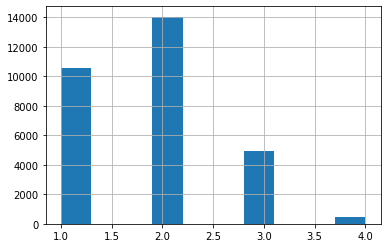

In [13]:
df['EDUCATION'].hist()

In [14]:
df['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [15]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [16]:
df['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [17]:
df['PAY_2'].value_counts()

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

In [18]:
df.loc[(df['PAY_0']==-1)|(df['PAY_0']==-2),'PAY_0']=0
df.loc[(df['PAY_2']==-1)|(df['PAY_2']==-2),'PAY_2']=0
df.loc[(df['PAY_3']==-1)|(df['PAY_3']==-2),'PAY_3']=0
df.loc[(df['PAY_4']==-1)|(df['PAY_4']==-2),'PAY_4']=0
df.loc[(df['PAY_5']==-1)|(df['PAY_5']==-2),'PAY_5']=0
df.loc[(df['PAY_6']==-1)|(df['PAY_6']==-2),'PAY_6']=0

In [19]:
df['PAY_0'].value_counts()

0    23182
1     3688
2     2667
3      322
4       76
5       26
8       19
6       11
7        9
Name: PAY_0, dtype: int64

In [20]:
df['BILL_AMT1'].value_counts()

0.0         2008
390.0        244
780.0         76
326.0         72
316.0         63
            ... 
52515.0        1
7691.0         1
10183.0        1
144525.0       1
79900.0        1
Name: BILL_AMT1, Length: 22723, dtype: int64

In [21]:
df.loc[(df['MARRIAGE']==0),'MARRIAGE']=3
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

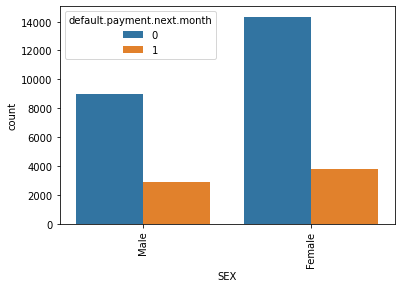

In [22]:
ax=sns.countplot(x='SEX', hue= 'default.payment.next.month', data=df )
ax.set_xticklabels(['Male','Female'],rotation=90)

[Text(0, 0, 'graduate school'),
 Text(1, 0, 'university'),
 Text(2, 0, 'high school'),
 Text(3, 0, 'others')]

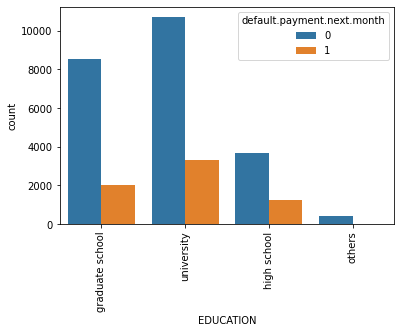

In [23]:
ax2=sns.countplot(x='EDUCATION', hue= 'default.payment.next.month', data=df )
ax2.set_xticklabels(['graduate school','university','high school','others'],rotation=90)


[Text(0, 0, 'married'), Text(1, 0, 'single'), Text(2, 0, 'others')]

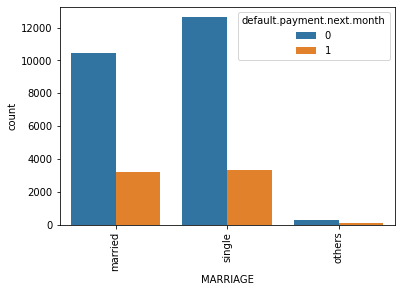

In [24]:
ax3=sns.countplot(x='MARRIAGE', hue= 'default.payment.next.month', data=df )
ax3.set_xticklabels(['married','single','others'],rotation=90)


c:\users\mfardhossein\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Density'>

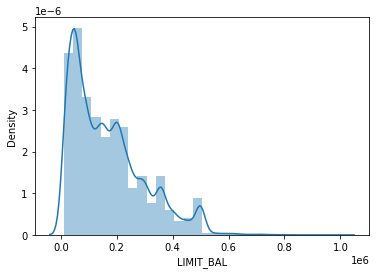

In [25]:
sns.distplot(df['LIMIT_BAL'],kde=True,bins=30)

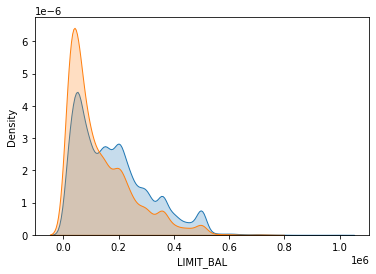

In [26]:
ax=sns.kdeplot(df.loc[(df['default.payment.next.month'] == 0),'LIMIT_BAL'] ,shade=True, label='no Default')
ax=sns.kdeplot(df.loc[(df['default.payment.next.month'] == 1),'LIMIT_BAL'] ,shade=True, label='Default')

c:\users\mfardhossein\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AGE', ylabel='Density'>

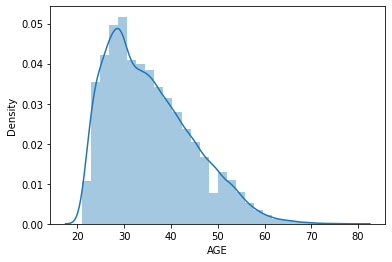

In [27]:
sns.distplot(df['AGE'],kde=True,bins=30)

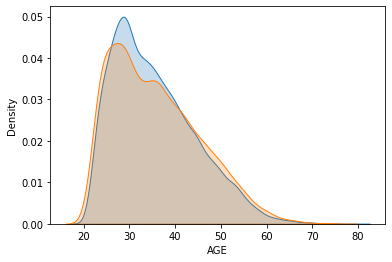

In [28]:
ax=sns.kdeplot(df.loc[(df['default.payment.next.month'] == 0),'AGE'] ,shade=True, label='no Default')
ax=sns.kdeplot(df.loc[(df['default.payment.next.month'] == 1),'AGE'] ,shade=True, label='Default')

In [29]:

#df['age_category']=pd.cut(df['AGE'], bins=[18,40, 60, 85],labels=['young', 'adult', 'senior'])


In [30]:
#df['age_category'].value_counts()

In [31]:
'''
df["age_category"]=df["age_category"].astype('category')
df["age_category"] = df["age_category"].cat.codes
'''

'\ndf["age_category"]=df["age_category"].astype(\'category\')\ndf["age_category"] = df["age_category"].cat.codes\n'

In [32]:
#df['age_category'].value_counts()

In [33]:
'''
labels_age_category = df['age_category'].astype('category').cat.categories.tolist()
replace_map_comp_age_categories = {'age_category' : {k: v for k,v in zip(labels_age_category,list(range(1,len(labels_age_category)+1)))}}

print(replace_map_comp_age_categories)
'''




"\nlabels_age_category = df['age_category'].astype('category').cat.categories.tolist()\nreplace_map_comp_age_categories = {'age_category' : {k: v for k,v in zip(labels_age_category,list(range(1,len(labels_age_category)+1)))}}\n\nprint(replace_map_comp_age_categories)\n"

In [34]:
#df.replace(replace_map_comp_age_categories, inplace=True)

In [35]:
#df['age_category'].value_counts()

In [36]:
#sns.countplot(x='age_category', hue= 'default.payment.next.month', data=df )

In [37]:
#df['age_category'].value_counts()

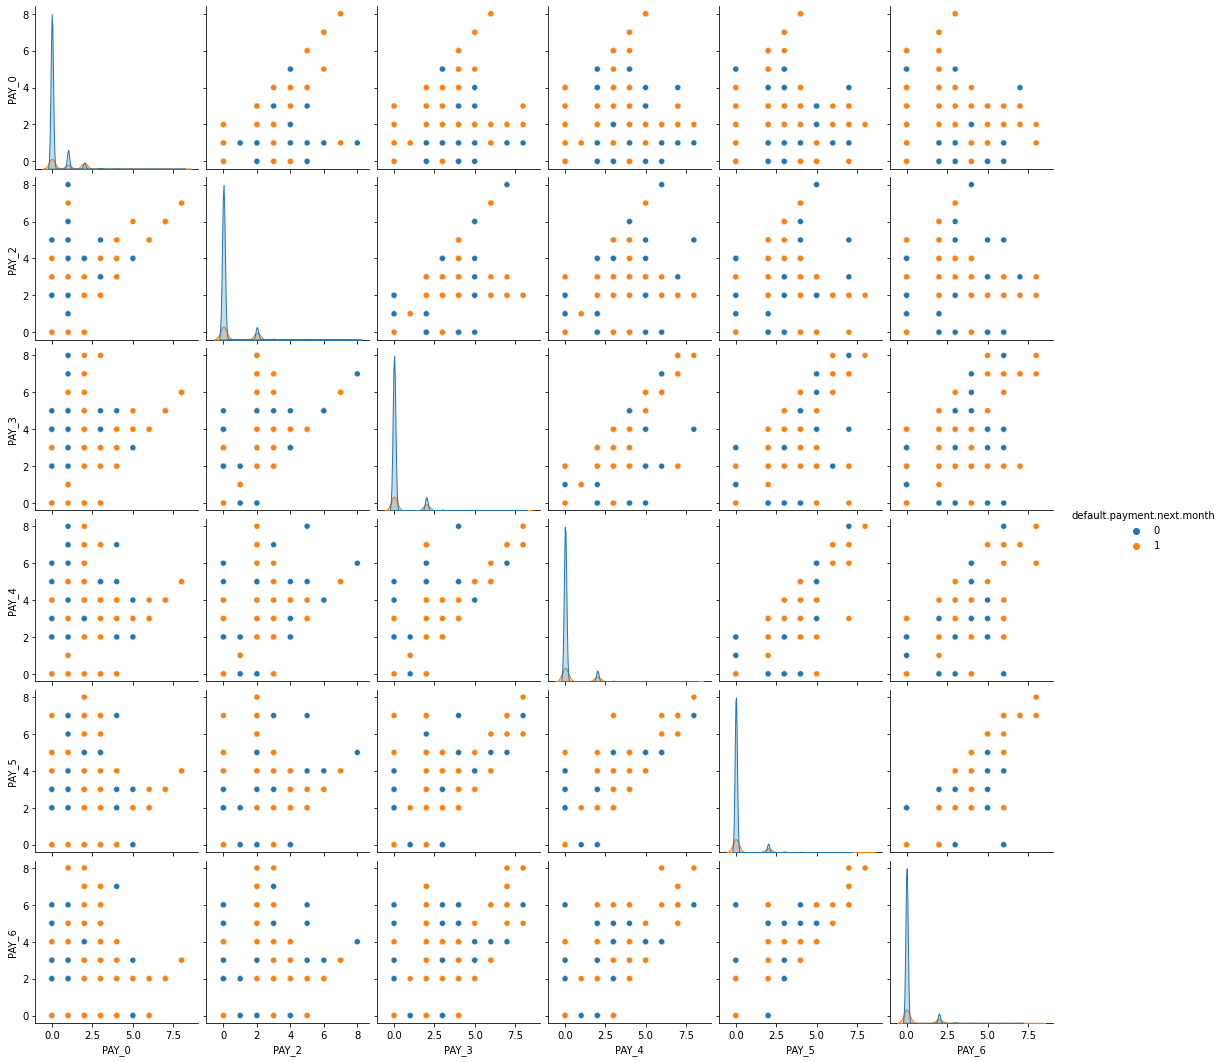

In [38]:
sns.pairplot(df, vars=df[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']], kind='scatter',hue= 'default.payment.next.month')

0    23182
1     3688
2     2667
3      322
4       76
5       26
8       19
6       11
7        9
Name: PAY_0, dtype: int64


<AxesSubplot:xlabel='PAY_6', ylabel='count'>

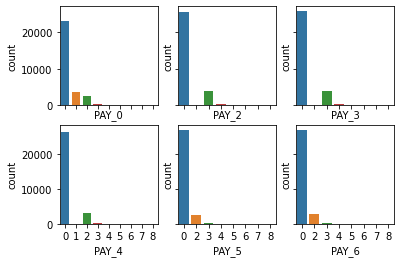

In [39]:

print(df['PAY_0'].value_counts())
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
sns.countplot(x="PAY_0", data=df, ax=ax[0,0])
sns.countplot(x="PAY_2", data=df, ax=ax[0,1])
sns.countplot(x="PAY_3", data=df, ax=ax[0,2])
sns.countplot(x="PAY_4", data=df, ax=ax[1,0])
sns.countplot(x="PAY_5", data=df, ax=ax[1,1])
sns.countplot(x="PAY_6", data=df, ax=ax[1,2])

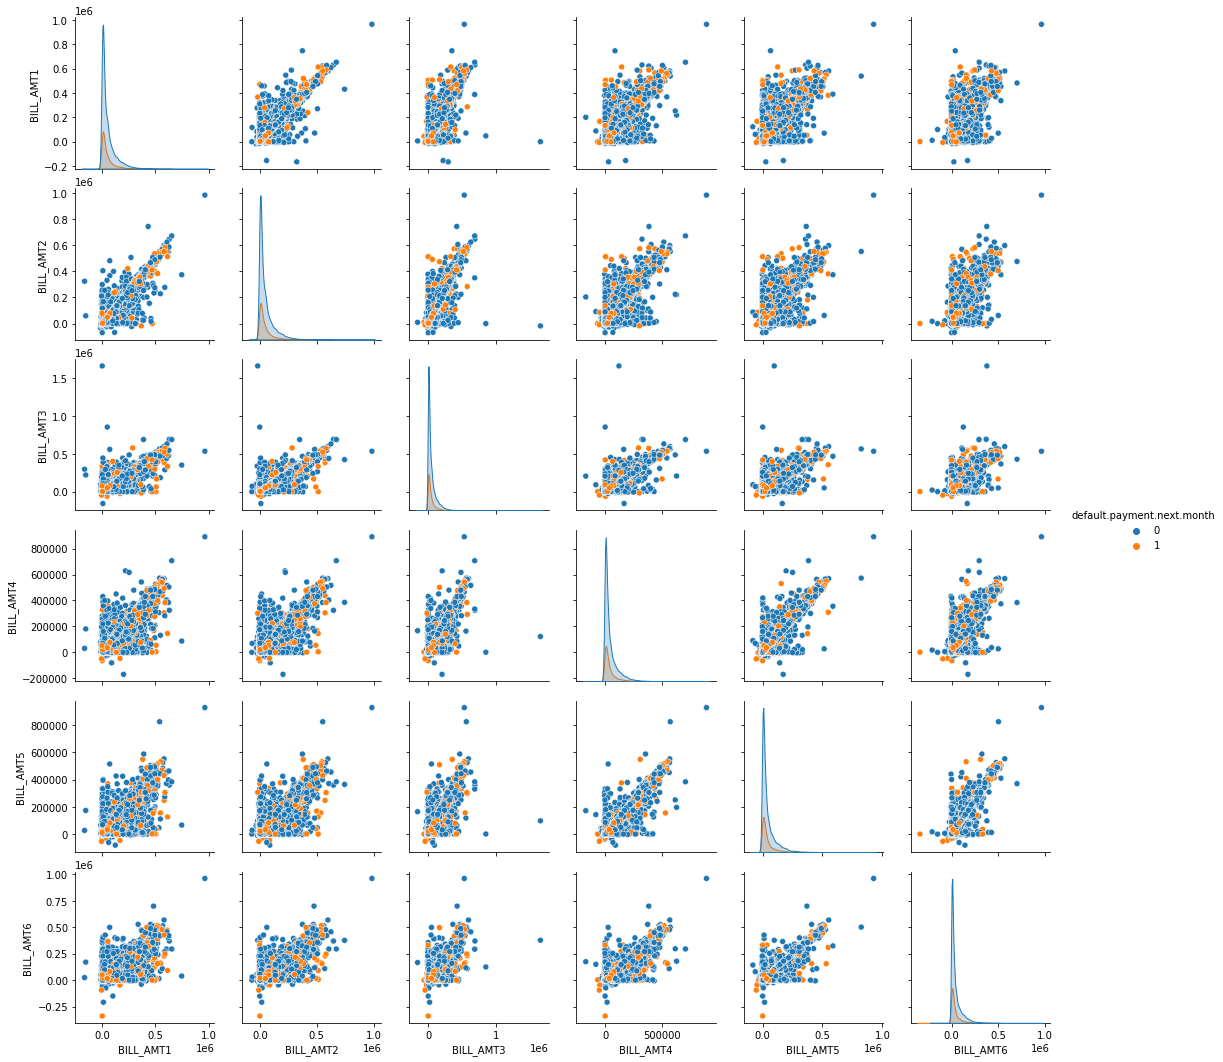

In [40]:
sns.pairplot(df, vars=df[['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']], kind='scatter',hue= 'default.payment.next.month')

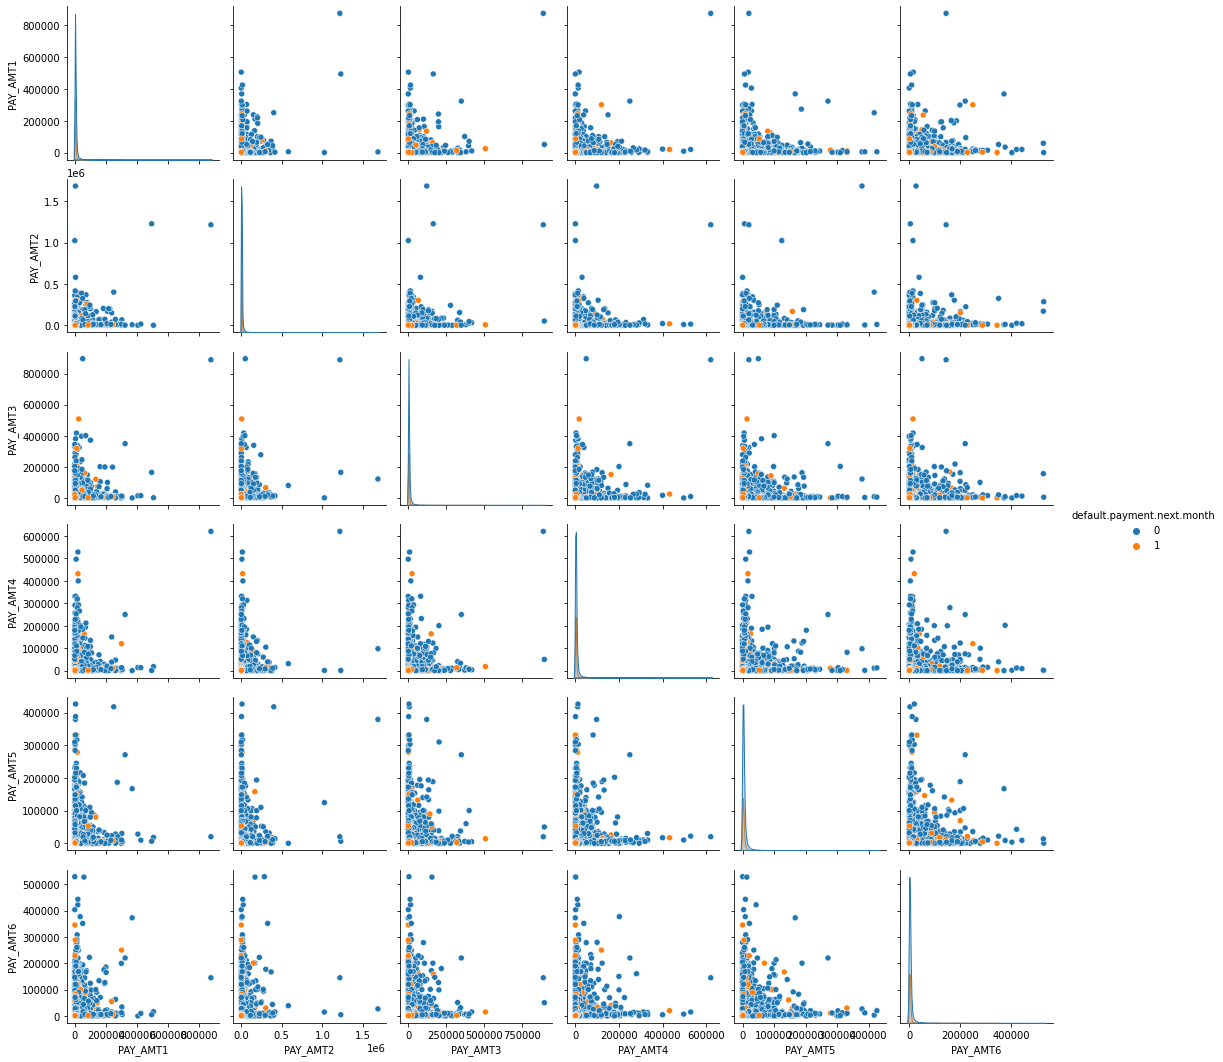

In [41]:
sns.pairplot(df, vars=df[['PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']], kind='scatter',hue= 'default.payment.next.month')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,1.000000,0.026179,0.018497,0.037659,-0.028208,0.018678,-0.020978,-0.010001,-0.018820,0.013700,...,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.231088,-0.111012,0.144713,-0.170745,-0.197136,-0.191323,-0.180629,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.013627,-0.028522,-0.090874,-0.034475,-0.044750,-0.041227,-0.039737,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.037659,-0.231088,0.013627,1.000000,-0.136797,0.182434,0.055937,0.062739,0.053058,0.051209,...,-0.006131,-0.012439,-0.012646,-0.041088,-0.032793,-0.044293,-0.040949,-0.045138,-0.044061,0.033842
MARRIAGE,-0.028208,-0.111012,-0.028522,-0.136797,1.000000,-0.412001,-0.011551,-0.009275,0.002556,-0.003029,...,-0.027274,-0.029270,-0.025066,-0.004653,-0.009513,-0.004250,-0.013970,-0.003019,-0.008383,-0.027575
AGE,0.018678,0.144713,-0.090874,0.182434,-0.412001,1.000000,-0.001447,-0.008774,-0.014266,-0.007288,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.020978,-0.170745,-0.034475,0.055937,-0.011551,-0.001447,1.000000,0.698389,0.516970,0.460224,...,0.022100,0.030731,0.030201,-0.079177,-0.057189,-0.062620,-0.061886,-0.053784,-0.048733,0.396019
PAY_2,-0.010001,-0.197136,-0.044750,0.062739,-0.009275,-0.008774,0.698389,1.000000,0.663529,0.512773,...,0.032467,0.040422,0.042222,-0.097475,-0.054838,-0.059865,-0.053981,-0.048714,-0.043099,0.327093
PAY_3,-0.018820,-0.191323,-0.041227,0.053058,0.002556,-0.014266,0.516970,0.663529,1.000000,0.678931,...,0.016579,0.026196,0.028979,-0.039356,-0.073670,-0.057702,-0.053849,-0.050805,-0.048443,0.286999
PAY_4,0.013700,-0.180629,-0.039737,0.051209,-0.003029,-0.007288,0.460224,0.512773,0.678931,1.000000,...,0.014654,0.027239,0.033138,-0.054484,-0.036877,-0.074064,-0.055305,-0.052732,-0.048828,0.269055


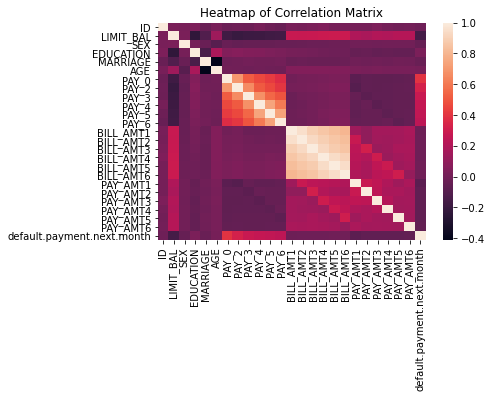

In [42]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')
corr    
    

<AxesSubplot:title={'center':'Correlation with Default'}>

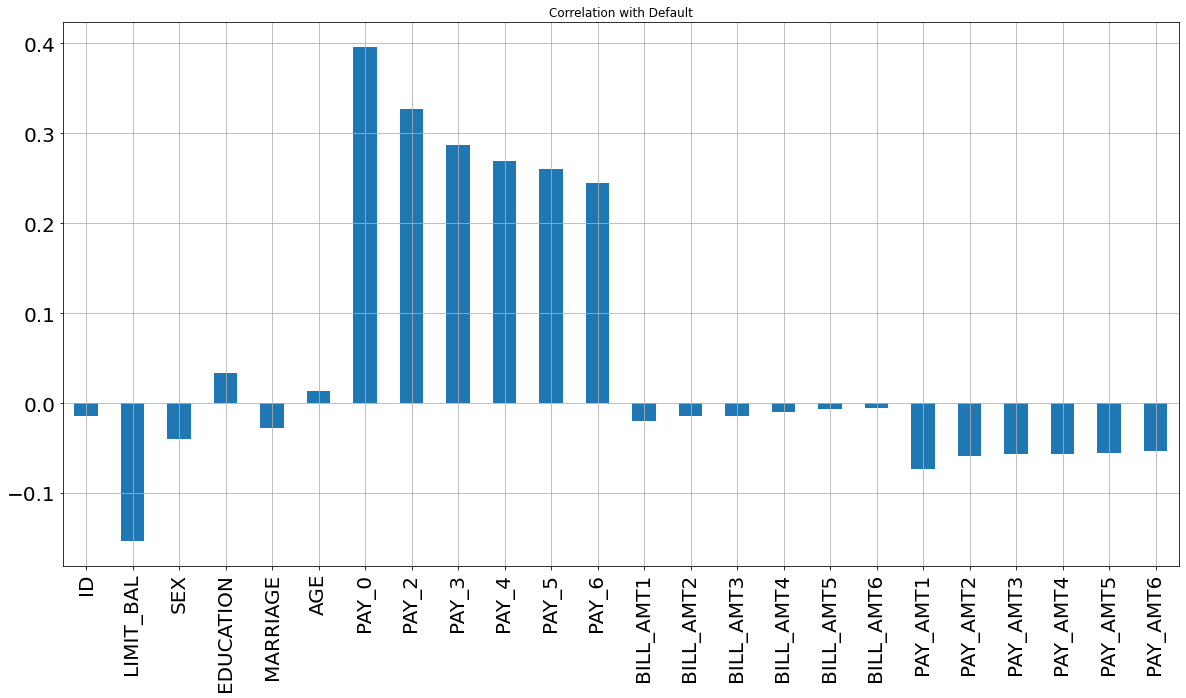

In [43]:
df.drop(['default.payment.next.month'],axis=1).corrwith(df['default.payment.next.month']).plot.bar(figsize = (20, 10), title = "Correlation with Default", 
                                        fontsize = 20,rot = 90, grid = True)

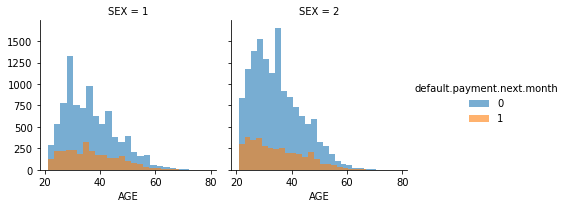

In [44]:

g = sns.FacetGrid(df, col='SEX', hue='default.payment.next.month')
g.map(plt.hist, 'AGE', alpha=0.6, bins=25) #alpha is for opacity
g.add_legend()

## Feature

In [45]:
total_balance=df[['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
df['total_BILL']=total_balance.sum(axis=1)
df['total_BILL']

0          3791.0
1         14395.0
2         72414.0
3        184344.0
4        100722.0
           ...   
29995    536401.0
29996     19499.0
29997     66931.0
29998    268256.0
29999    182945.0
Name: total_BILL, Length: 30000, dtype: float64

In [46]:
total_pay_amount=df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4','PAY_AMT5']]
df['total_pay_amount']=total_pay_amount.sum(axis=1)
df['total_pay_amount']

0           689.0
1          3000.0
2          6018.0
3          7388.0
4         58370.0
           ...   
29995     41550.0
29996     14490.0
29997     28200.0
29998    145377.0
29999      7308.0
Name: total_pay_amount, Length: 30000, dtype: float64

In [47]:
df['total_debt']= df['total_BILL'] -df['total_pay_amount']

In [48]:
df.loc[(df['PAY_0']==-1)|(df['PAY_0']==-2),'PAY_0']=0
df.loc[(df['PAY_2']==-1)|(df['PAY_2']==-2),'PAY_2']=0
df.loc[(df['PAY_3']==-1)|(df['PAY_3']==-2),'PAY_3']=0
df.loc[(df['PAY_4']==-1)|(df['PAY_4']==-2),'PAY_4']=0
df.loc[(df['PAY_5']==-1)|(df['PAY_5']==-2),'PAY_5']=0
df.loc[(df['PAY_6']==-1)|(df['PAY_6']==-2),'PAY_6']=0


In [49]:
pay_len=df[['PAY_0', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
df['pay_over_time']=pay_len.sum(axis=1)
df['pay_over_time']

0        4
1        4
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    9
29998    1
29999    0
Name: pay_over_time, Length: 30000, dtype: int64

## Data Separation

In [50]:
as_category = [ 'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','SEX','EDUCATION','MARRIAGE']

In [51]:

for i in ['SEX','EDUCATION','MARRIAGE']:
    df= pd.concat([df.drop(i, axis=1), pd.get_dummies(df[i], prefix=i, prefix_sep='_')], axis=1)


In [52]:
'''
profile_cleaning["gender"]=profile_cleaning["gender"].astype('category')
profile_cleaning["gender"] = profile_cleaning["gender"].cat.codes
'''

'\nprofile_cleaning["gender"]=profile_cleaning["gender"].astype(\'category\')\nprofile_cleaning["gender"] = profile_cleaning["gender"].cat.codes\n'

In [53]:
df

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,pay_over_time,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,20000.0,24,2,2,0,0,0,0,3913.0,...,4,0,1,0,1,0,0,1,0,0
1,2,120000.0,26,0,2,0,0,0,2,2682.0,...,4,0,1,0,1,0,0,0,1,0
2,3,90000.0,34,0,0,0,0,0,0,29239.0,...,0,0,1,0,1,0,0,0,1,0
3,4,50000.0,37,0,0,0,0,0,0,46990.0,...,0,0,1,0,1,0,0,1,0,0
4,5,50000.0,57,0,0,0,0,0,0,8617.0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,39,0,0,0,0,0,0,188948.0,...,0,1,0,0,0,1,0,1,0,0
29996,29997,150000.0,43,0,0,0,0,0,0,1683.0,...,0,1,0,0,0,1,0,0,1,0
29997,29998,30000.0,37,4,3,2,0,0,0,3565.0,...,9,1,0,0,1,0,0,0,1,0
29998,29999,80000.0,41,1,0,0,0,0,0,-1645.0,...,1,1,0,0,0,1,0,1,0,0


In [54]:
as_numeric = ['LIMIT_BAL','AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
             'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4','PAY_AMT5', 'PAY_AMT6','total_BILL','total_pay_amount','total_debt',
             'pay_over_time']



In [55]:
labels = ['default.payment.next.month']

## Pipelines

In [56]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder,LabelBinarizer,StandardScaler, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,precision_score, recall_score, roc_curve, roc_auc_score

In [57]:
'''
steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('SVM', SVC())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, parameters,cv=3)

# Fit to the training set
gm_cv.fit(X_train,y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))


'''

'\nsteps = [(\'imputation\', Imputer(missing_values=\'NaN\', strategy=\'mean\', axis=0)),\n         (\'scaler\', StandardScaler()),\n         (\'SVM\', SVC())]\n\n# Create the pipeline: pipeline \npipeline = Pipeline(steps)\n\n# Specify the hyperparameter space\nparameters = {\'SVM__C\':[1, 10, 100],\n              \'SVM__gamma\':[0.1, 0.01]}\n\n# Create train and test sets\nX_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)\n\n# Create the GridSearchCV object: gm_cv\ngm_cv = GridSearchCV(pipeline, parameters,cv=3)\n\n# Fit to the training set\ngm_cv.fit(X_train,y_train)\n\n# Compute and print the metrics\nr2 = gm_cv.score(X_test, y_test)\nprint("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))\nprint("Tuned ElasticNet R squared: {}".format(r2))\n\n\n'

In [58]:
'''
# normalizing some numerical values 
scaler = MinMaxScaler()
features = ['time', 'amount', 'reward', 'difficulty','duration','duration_days','age', 'income']
X_scaled = X.copy()
X_scaled[features] = scaler.fit_transform(X_scaled[features])
X_scaled.head()
'''

"\n# normalizing some numerical values \nscaler = MinMaxScaler()\nfeatures = ['time', 'amount', 'reward', 'difficulty','duration','duration_days','age', 'income']\nX_scaled = X.copy()\nX_scaled[features] = scaler.fit_transform(X_scaled[features])\nX_scaled.head()\n"

In [59]:
df['default.payment.next.month'].value_counts(1)

0    0.7788
1    0.2212
Name: default.payment.next.month, dtype: float64

Text(0, 0.5, 'Count')

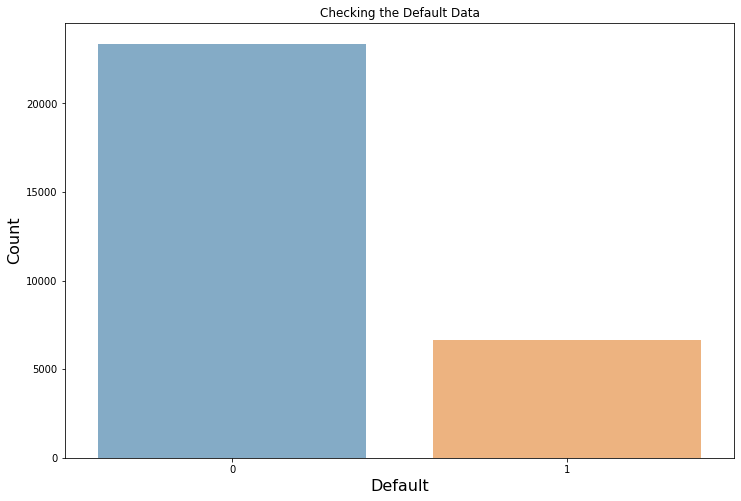

In [60]:
plt.figure(figsize=(12,8))
ev = df['default.payment.next.month'].value_counts()
sns.barplot(y=ev.values, x=ev.index, alpha=0.6)
plt.title('Checking the Default Data')
plt.xlabel('Default', fontsize=16)
plt.ylabel('Count', fontsize=16)

In [61]:
X = df.drop(['ID', 'default.payment.next.month'], axis=1)
Y = df['default.payment.next.month']

In [62]:
X.shape

(30000, 33)

In [63]:
Y.shape

(30000,)

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
X.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,pay_over_time,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000.0,24,2,2,0,0,0,0,3913.0,3102.0,...,4,0,1,0,1,0,0,1,0,0
1,120000.0,26,0,2,0,0,0,2,2682.0,1725.0,...,4,0,1,0,1,0,0,0,1,0
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,...,0,0,1,0,1,0,0,0,1,0
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,...,0,0,1,0,1,0,0,1,0,0
4,50000.0,57,0,0,0,0,0,0,8617.0,5670.0,...,0,1,0,0,1,0,0,1,0,0


In [66]:
# normalizing some numerical values 
scaler = MinMaxScaler()
features = as_numeric
X_scaled = X.copy()
X_scaled[features] = scaler.fit_transform(X_scaled[features])
X_scaled.head()
#df[as_numeric]=df[as_numeric].apply(lambda x: (x-np.mean(x))/np.std(x))

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,pay_over_time,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,0.010101,0.051724,2,2,0,0,0,0,0.149982,0.069164,...,0.111111,0,1,0,1,0,0,1,0,0
1,0.111111,0.086207,0,2,0,0,0,2,0.148892,0.067858,...,0.111111,0,1,0,1,0,0,0,1,0
2,0.080808,0.224138,0,0,0,0,0,0,0.172392,0.079532,...,0.000000,0,1,0,1,0,0,0,1,0
3,0.040404,0.275862,0,0,0,0,0,0,0.188100,0.111995,...,0.000000,0,1,0,1,0,0,1,0,0
4,0.040404,0.620690,0,0,0,0,0,0,0.154144,0.071601,...,0.000000,1,0,0,1,0,0,1,0,0


In [67]:
# creating training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y,stratify=Y,test_size=0.20, random_state=123)

In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE , ADASYN
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [70]:
# Upsample minority class
X_train_u, y_train_u = resample(X_train[y_train == 1],
                                y_train[y_train == 1],
                                replace=True,
                                n_samples=X_train[y_train == 0].shape[0],
                                random_state=1)

X_train_u = np.concatenate((X_train[y_train == 0], X_train_u))
y_train_u = np.concatenate((y_train[y_train == 0], y_train_u))


# Upsample using SMOTE
sm = SMOTE(random_state=12)
x_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)


# Downsample majority class
X_train_d, y_train_d = resample(X_train[y_train == 0],
                                y_train[y_train == 0],
                                replace=True,
                                n_samples=X_train[y_train == 1].shape[0],
                                random_state=1)
X_train_d = np.concatenate((X_train[y_train == 1], X_train_d))
y_train_d = np.concatenate((y_train[y_train == 1], y_train_d))


print("Original shape:", X_train.shape, y_train.shape)
print("Upsampled shape:", X_train_u.shape, y_train_u.shape)
print ("SMOTE sample shape:", x_train_sm.shape, y_train_sm.shape)
print("Downsampled shape:", X_train_d.shape, y_train_d.shape)

Original shape: (24000, 33) (24000,)
Upsampled shape: (37382, 33) (37382,)
SMOTE sample shape: (37382, 33) (37382,)
Downsampled shape: (10618, 33) (10618,)


In [71]:
# Create the Original, Upsampled, and Downsampled training sets
methods_data = {"Original": (X_train, y_train),
                "Upsampled": (X_train_u, y_train_u),
                "SMOTE":(x_train_sm, y_train_sm),
                "Downsampled": (X_train_d, y_train_d)}

# Loop through each type of training sets and apply 5-Fold CV using Logistic Regression
# By default in cross_val_score StratifiedCV is used
for method in methods_data.keys():
    lr_results = cross_val_score(LogisticRegression(), methods_data[method][0], methods_data[method][1], cv=5, scoring='f1')
    print(f"The best F1 Score for {method} data:")
    print (lr_results.mean())
 
cross_val_score(LogisticRegression(class_weight='balanced'), X_train, y_train, cv=5, scoring='f1').mean()

c:\users\mfardhossein\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\mfardhossein\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
  

The best F1 Score for Original data:
0.44174044820938735


c:\users\mfardhossein\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\mfardhossein\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
  

The best F1 Score for Upsampled data:
0.6519899968860325


c:\users\mfardhossein\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\mfardhossein\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
  

The best F1 Score for SMOTE data:
0.6583345548374842


c:\users\mfardhossein\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\mfardhossein\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
  

The best F1 Score for Downsampled data:
0.6529408489033564


c:\users\mfardhossein\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\mfardhossein\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
  

0.5277430821711278

In [72]:
lr = LogisticRegression(random_state=1,solver='liblinear')
lr_result = cross_val_score(lr, x_train_sm, y_train_sm, cv=5, scoring='f1')
lr_result.mean()

0.6589630265675135

In [73]:


# Fit the model to the Downsampling data
lr = lr.fit(x_train_sm, y_train_sm)

print ("\n\n ---Logistic Regression Model---")
lr_auc = roc_auc_score(y_test, lr.predict(X_test))
lr_auc2 = accuracy_score(y_test, lr.predict(X_test))

print ("Logistic Regression AUC = %2.2f" % lr_auc)

lr2 = lr.fit(X_train, y_train)
print(classification_report(y_test, lr.predict(X_test)))



 ---Logistic Regression Model---
Logistic Regression AUC = 0.71
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4673
           1       0.69      0.32      0.44      1327

    accuracy                           0.82      6000
   macro avg       0.76      0.64      0.66      6000
weighted avg       0.80      0.82      0.79      6000



Confusion matrix Logistic Regression
[[4482  191]
 [ 903  424]]
Confusion matrix Logistic Regression
[[0.9591269  0.0408731 ]
 [0.68048229 0.31951771]]


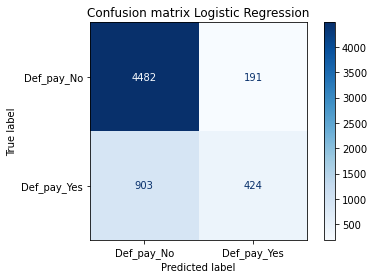

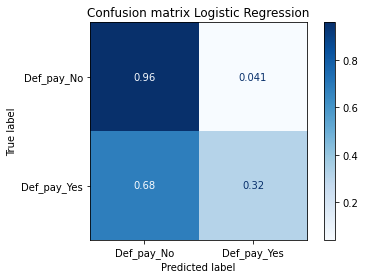

In [74]:
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix Logistic Regression", None),
                  ("Confusion matrix Logistic Regression", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(lr, X_test, y_test,
                                 display_labels=['Def_pay_No','Def_pay_Yes'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [75]:
lr.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [76]:
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,roc_curve,auc

In [131]:
lr_params = {'C': [100, 10, 1.0, 0.1, 0.01], 'class_weight': [None, 'balanced'], 'penalty': ['l1', 'l2']}

In [132]:
from sklearn.model_selection import RepeatedStratifiedKFold
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


In [133]:
grid_search_log = GridSearchCV(estimator=lr,param_grid=lr_params,scoring='accuracy',cv=5,n_jobs=-1)

In [134]:
grid_search_log = grid_search_log.fit(x_train_sm, y_train_sm)

In [135]:
best_accuracy = grid_search_log.best_score_

In [136]:
print('Accuracy on Cross Validation set :',best_accuracy)

Accuracy on Cross Validation set : 0.7088976839479129


In [137]:

best_parameters = grid_search_log.best_params_
best_parameters

{'C': 100, 'class_weight': 'balanced', 'penalty': 'l2'}

In [84]:
y_pred_log = grid_search_log.predict(X_test)

In [85]:
roc=roc_auc_score(y_test, y_pred_log)
acc = accuracy_score(y_test, y_pred_log)
prec = precision_score(y_test, y_pred_log)
rec = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)

In [86]:
accuracy_score(y_test, y_pred_log)

0.7881666666666667

In [87]:
print(classification_report(y_test, grid_search_log.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      4673
           1       0.52      0.54      0.53      1327

    accuracy                           0.79      6000
   macro avg       0.69      0.70      0.70      6000
weighted avg       0.79      0.79      0.79      6000



In [88]:
confusion_matrix(y_test, grid_search_log.predict(X_test))

array([[4009,  664],
       [ 607,  720]], dtype=int64)

Confusion matrix, Logistic Regression
[[4009  664]
 [ 607  720]]
Confusion Logistic Regression
[[0.85790713 0.14209287]
 [0.45742276 0.54257724]]


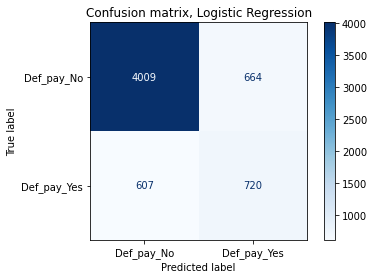

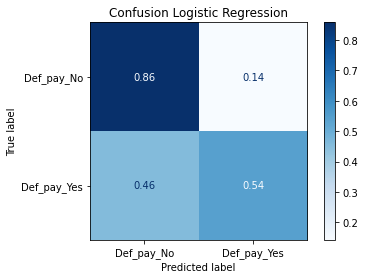

In [89]:
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, Logistic Regression", None),
                  ("Confusion Logistic Regression", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(grid_search_log, X_test, y_test,
                                 display_labels=['Def_pay_No','Def_pay_Yes'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [90]:
y_proba = grid_search_log.predict_proba(X_test)[:,1]

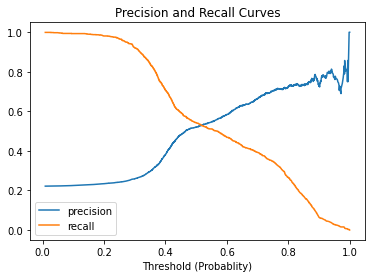

In [93]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, y_proba)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (Probablity)')
plt.title('Precision and Recall Curves');

In [94]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
Final_PCA=principalDf.values
print(pca.components_)
print(pca.explained_variance_)

[[-2.05574474e-02 -1.04618090e-03  3.74426132e-01  4.34162803e-01
   4.46432990e-01  4.31780313e-01  3.90676706e-01  3.53925231e-01
  -6.25251818e-04 -1.43418627e-05  2.66549470e-04  1.11840346e-03
   1.69945174e-03  1.42315484e-03 -1.01441986e-03 -6.01215256e-04
  -9.49182637e-04 -1.16781936e-03 -1.64724086e-03 -1.35476658e-03
   1.12658845e-03 -1.15418402e-03  1.60195853e-03  6.75390049e-02
   2.03359225e-02 -2.03359225e-02 -3.27845902e-02  2.40860626e-02
   1.24624566e-02 -3.76392900e-03  3.20834626e-03 -3.54261652e-03
   3.34270260e-04]
 [ 2.24417781e-03 -4.89923221e-02 -4.21719909e-01 -4.23221679e-01
  -7.26417492e-02  2.50055282e-01  3.59163599e-01  3.80492478e-01
  -3.30888901e-03 -3.04075096e-03 -1.38460766e-03 -1.32346910e-03
  -7.73352254e-04 -2.60153847e-04  9.72576226e-04  3.95401248e-04
   5.69969402e-04  3.27138243e-04  5.38168670e-05  3.10929861e-04
  -1.77920993e-03  6.22364086e-04 -1.78961691e-03  2.00355619e-03
   8.53793102e-02 -8.53793102e-02  1.89870465e-01 -1.4062

In [95]:

training_data_log, validation_data_log, training_labels_log, validation_labels_log = train_test_split(Final_PCA, Y, train_size = 0.8, test_size = 0.2, random_state = 100)
#classifier_2=SVC(kernel= "linear")
grid_search_log.fit(training_data_log, training_labels_log)
print(grid_search_log.score(validation_data_log, validation_labels_log))


0.8065


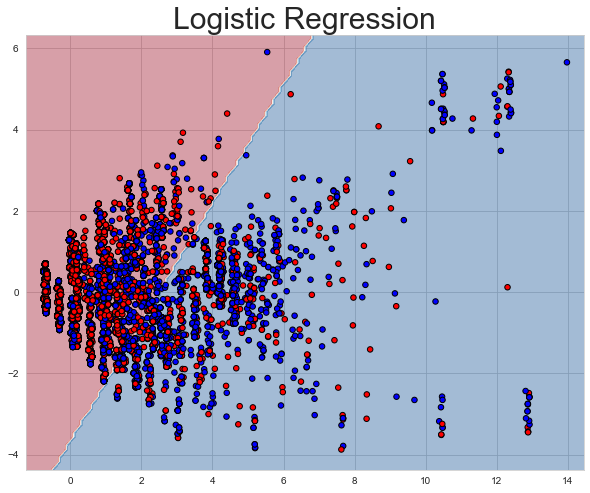

In [96]:
sns.set_style('whitegrid')
sns.color_palette("pastel")

x_min, x_max = Final_PCA[:, 0].min() - 0.5, Final_PCA[:, 0].max() + 0.5
y_min, y_max = Final_PCA[:, 1].min() - 0.5, Final_PCA[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
f, axarr = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10, 8))



Z = grid_search_log.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axarr.contourf(xx, yy, Z,cmap=cm, alpha=0.4)
axarr.scatter(Final_PCA[:, 0], Final_PCA[:, 1], c=Y, s=30, edgecolor='k',cmap=cm_bright)
axarr.set_title('Logistic Regression', {'fontsize': 30})

plt.show()


In [97]:
import numpy as np
import seaborn as sns
import math
import json
import datetime
import matplotlib.pyplot as plt 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.metrics import roc_curve
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers.core import Dense, Dropout, Activation
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [98]:
rf = RandomForestClassifier()
rf_result = cross_val_score(rf, x_train_sm, y_train_sm, cv=5, scoring='f1')
rf_result.mean()

0.8294265326401424

In [99]:
rf = rf.fit(x_train_sm, y_train_sm)

print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))



 ---Random Forest Model---
Random Forest AUC = 0.68
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4673
           1       0.51      0.50      0.50      1327

    accuracy                           0.78      6000
   macro avg       0.69      0.68      0.68      6000
weighted avg       0.78      0.78      0.78      6000



Confusion matrix, Logistic Regression
[[4050  623]
 [ 669  658]]
Confusion Random Forest
[[0.86668093 0.13331907]
 [0.50414469 0.49585531]]


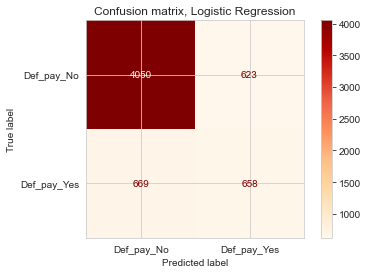

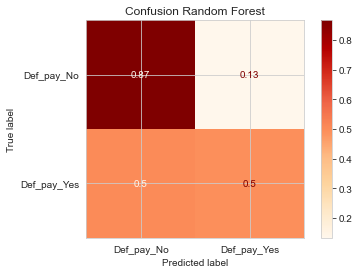

In [100]:
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, Logistic Regression", None),
                  ("Confusion Random Forest", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rf, X_test, y_test,
                                 display_labels=['Def_pay_No','Def_pay_Yes'],
                                 cmap=plt.cm.OrRd,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [101]:
param_grid_rf = {'n_estimators': [200, 600, 1000], # It is going to be a long search
              'criterion': ['entropy', 'gini'],
              'class_weight' : ['balanced',None]}
grid_search_rf = GridSearchCV(estimator=rf,param_grid=param_grid_rf,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_rf = grid_search_rf.fit(x_train_sm, y_train_sm)


In [102]:
best_accuracy_1 = grid_search_rf.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8402461073240979


In [103]:
best_parameters_2 = grid_search_rf.best_params_
best_parameters_2

{'class_weight': 'balanced', 'criterion': 'gini', 'n_estimators': 600}

In [104]:
print(classification_report(y_test, grid_search_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4673
           1       0.51      0.50      0.51      1327

    accuracy                           0.78      6000
   macro avg       0.68      0.68      0.68      6000
weighted avg       0.78      0.78      0.78      6000



Confusion matrix, Logistic Regression
[[4036  637]
 [ 663  664]]
Confusion Random Forest
[[0.863685   0.136315  ]
 [0.49962321 0.50037679]]


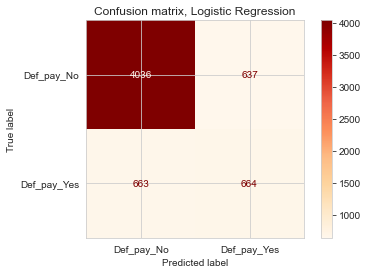

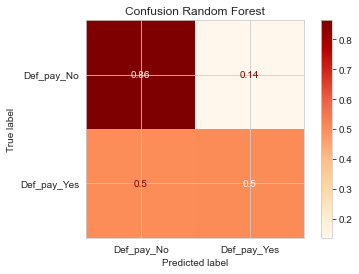

In [105]:
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, Logistic Regression", None),
                  ("Confusion Random Forest", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(grid_search_rf, X_test, y_test,
                                 display_labels=['Def_pay_No','Def_pay_Yes'],
                                 cmap=plt.cm.OrRd,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [106]:
y_proba_rf = grid_search_rf.predict_proba(X_test)[:,1]

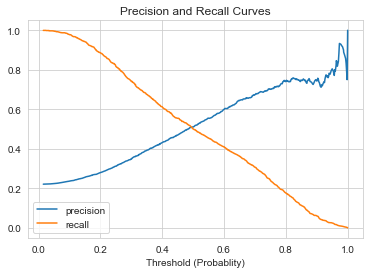

In [107]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, y_proba_rf)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (Probablity)')
plt.title('Precision and Recall Curves');

In [108]:

training_data_rf, validation_data_rf, training_labels_rf, validation_labels_rf = train_test_split(Final_PCA, Y, train_size = 0.8, test_size = 0.2, random_state = 100)
#classifier_2=SVC(kernel= "linear")
grid_search_rf.fit(training_data_rf, training_labels_rf)
print(grid_search_rf.score(validation_data_rf, validation_labels_rf))


0.785


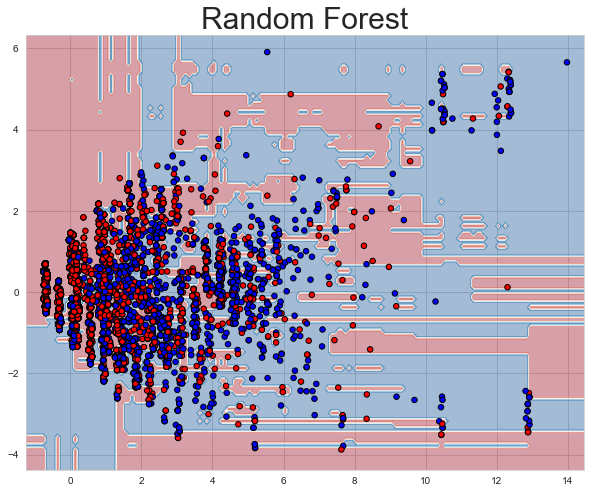

In [109]:
sns.set_style('whitegrid')
sns.color_palette("pastel")

x_min, x_max = Final_PCA[:, 0].min() - 0.5, Final_PCA[:, 0].max() + 0.5
y_min, y_max = Final_PCA[:, 1].min() - 0.5, Final_PCA[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
f, axarr = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10, 8))



Z = grid_search_rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axarr.contourf(xx, yy, Z,cmap=cm, alpha=0.4)
axarr.scatter(Final_PCA[:, 0], Final_PCA[:, 1], c=Y, s=30, edgecolor='k',cmap=cm_bright)
axarr.set_title('Random Forest', {'fontsize': 30})

plt.show()


In [110]:
# Decision Tree Machine Model using crossvalidation
Dt=DecisionTreeClassifier(criterion = 'entropy')
Dt.fit(x_train_sm, y_train_sm)
Dt_result = cross_val_score(Dt, x_train_sm, y_train_sm, cv=5, scoring='f1')
Dt_result.mean()

0.7512049193189423

In [111]:
print ("\n\n ---Decision Tree Classifier---")
Dt_auc = roc_auc_score(y_test, Dt.predict(X_test))
print ("Decision Tree Classifier AUC = %2.2f" % Dt_auc)
print(classification_report(y_test, Dt.predict(X_test)))



 ---Decision Tree Classifier---
Decision Tree Classifier AUC = 0.61
              precision    recall  f1-score   support

           0       0.83      0.74      0.78      4673
           1       0.34      0.48      0.40      1327

    accuracy                           0.68      6000
   macro avg       0.59      0.61      0.59      6000
weighted avg       0.72      0.68      0.70      6000



In [112]:
parameters = {'max_depth':[2,4,6,8,10],'min_samples_leaf':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10]}
grid_search_dt = GridSearchCV(estimator=Dt,param_grid=parameters,scoring = 'accuracy',cv=5,n_jobs=-1)
grid_search_dt = grid_search_dt.fit(x_train_sm,y_train_sm)

In [113]:

print('Accuracy on Cross Validation set : {}'.format(grid_search_dt.best_score_))
print("Best Parameters are: {}".format(grid_search_dt.best_params_))

Accuracy on Cross Validation set : 0.7434611746398604
Best Parameters are: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 4}


In [114]:
print(classification_report(y_test, grid_search_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      4673
           1       0.41      0.58      0.48      1327

    accuracy                           0.72      6000
   macro avg       0.64      0.67      0.65      6000
weighted avg       0.77      0.72      0.74      6000



In [115]:
print(classification_report(y_test, grid_search_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      4673
           1       0.41      0.58      0.48      1327

    accuracy                           0.72      6000
   macro avg       0.64      0.67      0.65      6000
weighted avg       0.77      0.72      0.74      6000



Confusion matrix, Logistic Regression
[[3571 1102]
 [ 551  776]]
Confusion Logistic Regression
[[0.76417719 0.23582281]
 [0.41522231 0.58477769]]


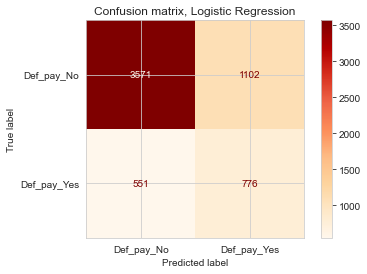

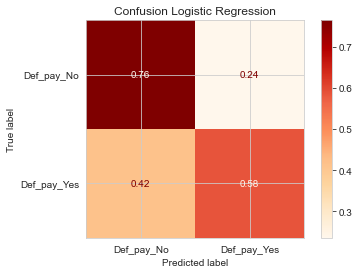

In [116]:
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, Logistic Regression", None),
                  ("Confusion Logistic Regression", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(grid_search_dt, X_test, y_test,
                                 display_labels=['Def_pay_No','Def_pay_Yes'],
                                 cmap=plt.cm.OrRd,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [117]:
y_proba_dt = grid_search_dt.predict_proba(X_test)[:,1]

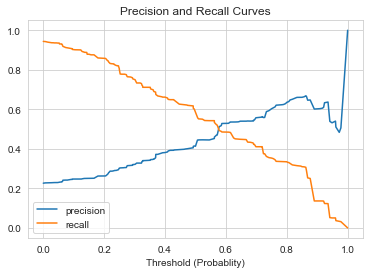

In [118]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, y_proba_dt)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (Probablity)')
plt.title('Precision and Recall Curves');

In [119]:
# K Nearest Neighbour Model using crossvalidation
KNN = KNeighborsClassifier(n_neighbors = 7)
KNN.fit(x_train_sm, y_train_sm)
KNN_result = cross_val_score(KNN, x_train_sm, y_train_sm, cv=5, scoring='f1')
KNN_result.mean()

0.781951424821836

In [120]:
print ("\n\n ---K Nearest Neighbour Classifier---")
KNN_auc = roc_auc_score(y_test, KNN.predict(X_test))
print ("K Nearest Neighbour Classifier Classifier AUC = %2.2f" % KNN_auc)
print(classification_report(y_test, KNN.predict(X_test)))



 ---K Nearest Neighbour Classifier---
K Nearest Neighbour Classifier Classifier AUC = 0.65
              precision    recall  f1-score   support

           0       0.86      0.69      0.77      4673
           1       0.36      0.62      0.45      1327

    accuracy                           0.67      6000
   macro avg       0.61      0.65      0.61      6000
weighted avg       0.75      0.67      0.70      6000



In [121]:
roc_auc_score(y_test, KNN.predict(X_test))


0.6524812407405107

In [122]:
accuracy_score(y_test, KNN.predict(X_test))


0.6721666666666667

In [123]:
precision_score(y_test, KNN.predict(X_test))


0.3595258999122037

In [124]:
recall_score(y_test, KNN.predict(X_test))


0.6171816126601356

In [125]:

f1_score(y_test, KNN.predict(X_test))

0.454368932038835

In [126]:
k_range = list(range(1, 10))
leaf_size = list(range(1,10))
weight_options = ['uniform', 'distance']
knn_param = {'n_neighbors': k_range, 'leaf_size': leaf_size, 'weights': weight_options}

In [127]:
grid_search_knn = GridSearchCV(estimator = KNN,param_grid = knn_param,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_knn = grid_search_knn.fit(x_train_sm,y_train_sm)

In [128]:

print('Accuracy on Cross Validation set : {}'.format(grid_search_knn.best_score_))
print("Best Parameters are: {}".format(grid_search_knn.best_params_))

Accuracy on Cross Validation set : 0.8220271146479309
Best Parameters are: {'leaf_size': 1, 'n_neighbors': 2, 'weights': 'distance'}


In [129]:
print(classification_report(y_test, grid_search_knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79      4673
           1       0.36      0.47      0.40      1327

    accuracy                           0.69      6000
   macro avg       0.59      0.61      0.60      6000
weighted avg       0.73      0.69      0.71      6000



In [ ]:
SVM = SVC()
SVM.fit(X_train, y_train)
SVM_result = cross_val_score(SVM, x_train_sm, y_train_sm, cv=5, scoring='f1')
SVM_result.mean()

In [ ]:
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, Logistic Regression", None),
                  ("Confusion SVM", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(SVM, X_test, y_test,
                                 display_labels=['Def_pay_No','Def_pay_Yes'],
                                 cmap=plt.cm.Greens,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
SVM.get_params().keys()

In [ ]:
svm_params = [{'C':[1, 10, 100],
              'gamma':[0.1, 0.01]}]
gm_cv = GridSearchCV(SVM, param_grid=svm_params,scoring='accuracy',cv=5,n_jobs=-1)
gm_cv = gm_cv.fit(x_train_sm,y_train_sm)

In [ ]:
best_accuracy_1 = gm_cv.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

In [ ]:
best_parameters_2 = gm_cv.best_params_
best_parameters_2

In [ ]:
print ("\n\n ---SVM Classifier---")
SVM_auc = roc_auc_score(y_test, gm_cv.predict(X_test))
print ("SVM Classifier Classifier AUC = %2.2f" % SVM_auc)
print(classification_report(y_test, gm_cv.predict(X_test)))

In [ ]:
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, Logistic Regression", None),
                  ("Confusion SVM", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(gm_cv, X_test, y_test,
                                 display_labels=['Def_pay_No','Def_pay_Yes'],
                                 cmap=plt.cm.Greens,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
y_proba_svm = gm_cv.predict_proba(X_test)[:,1]

In [ ]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, y_proba_svm)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (Probablity)')
plt.title('Precision and Recall Curves');

In [ ]:
training_data_svm, validation_data_svm, training_labels_svm, validation_labels_svm = train_test_split(Final_PCA, Y, train_size = 0.8, test_size = 0.2, random_state = 100)
#classifier_2=SVC(kernel= "linear")
gm_cv.fit(training_data_svm, training_labels_svm)
print(grid_search_rf.score(validation_data_svm, validation_labels_svm))


In [ ]:
sns.set_style('whitegrid')
sns.color_palette("pastel")

x_min, x_max = Final_PCA[:, 0].min() - 0.5, Final_PCA[:, 0].max() + 0.5
y_min, y_max = Final_PCA[:, 1].min() - 0.5, Final_PCA[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
f, axarr = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10, 8))



Z = gm_cv.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axarr.contourf(xx, yy, Z,cmap=cm, alpha=0.4)
axarr.scatter(Final_PCA[:, 0], Final_PCA[:, 1], c=Y, s=30, edgecolor='k',cmap=cm_bright)
axarr.set_title('SVM', {'fontsize': 30})

plt.show()

In [ ]:
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
svm_params = [{'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}]

# Create train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, param_grid=svm_params,scoring='accuracy',cv=5,n_jobs=-1)

# Fit to the training set
gm_cv = gm_cv.fit(X_train,y_train)


# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("SVM best parameters: {}".format(gm_cv.best_params_))
print("Accuracy: {}".format(r2))


In [ ]:
best_accuracy_1 = gm_cv.best_score_
print('Accuracy on Cross Validation set :',gm_cv.best_score_)

In [ ]:
best_parameters = gm_cv.best_params_
best_parameters

In [ ]:
y_pred_svc =gm_cv.predict(X_test)

In [ ]:
print(classification_report(y_test, gm_cv.predict(X_test)))

In [130]:
#Finding the fpr, tpr and tresholds for the classifires
fpr, tpr, thresholds = roc_curve(y_test, grid_search_log.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, grid_search_rf.predict_proba(X_test)[:,1])
#gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test, gbc.predict_proba(X_test)[:,1])
#gnb_fpr, gnb_tpr, gnb_thresholds = roc_curve(y_test, gnb.predict_proba(X_test)[:,1])
KNN_fpr, KNN_tpr, KNN_thresholds = roc_curve(y_test, grid_search_knn.predict_proba(X_test)[:,1])
Dt_fpr, Dt_tpr, Dt_thresholds = roc_curve(y_test, grid_search_dt.predict_proba(X_test)[:,1])
#SVM_fpr, SVM_tpr, SVM_thresholds = roc_curve(y_test, SVM.predict_proba(X_test)[:,1])

plt.figure(figsize=(13,8))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
#plt.plot(gbc_fpr, gbc_tpr, label='Gradient Boosting Classifier (area = %0.2f)' % gbc_auc)

# Plot Logistic GussianNB
#plt.plot(gnb_fpr, gnb_tpr, label='GussianNB (area = %0.2f)' % gnb_auc)

# Plot Random Forest ROC
plt.plot(KNN_fpr, KNN_tpr, label='K Nearest Neighbour Classifier (area = %0.2f)' % KNN_auc)

# Plot Decision Tree ROC
plt.plot(Dt_fpr, Dt_tpr, label='Decision Tree Classifier (area = %0.2f)' % Dt_auc)

# Plot SVM ROC
#plt.plot(SVM_fpr, SVM_tpr, label='SVM Classifier (area = %0.2f)' % SVM_auc)



# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()


ValueError: X has 33 features per sample; expecting 2

In [ ]:
# Get Feature Importances
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances

In [ ]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the Feature Importance
sns.set_color_codes("pastel")
sns.barplot(x="importance", y='index', data=feature_importances,
            label="Total", color="b")

In [ ]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers.core import Dense, Dropout, Activation

# Convert the target to categorical: target
target = to_categorical(y_train_sm)
predictors= x_train_sm.values
n_cols = predictors.shape[1]
# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation= 'relu', input_shape=(n_cols,)))
model.add(Dropout(.1))
model.add(Dense(100, activation= 'relu'))
model.add(Dropout(.25))
model.add(Dense(100, activation= 'relu'))
model.add(Dropout(.25))


# Add the output layer
model.add(Dense(2,activation= 'softmax'))

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model_1_training = model.fit(predictors, target, epochs=20, validation_split=0.4, verbose=True)



In [ ]:
# Evaluate your model accuracy on the test set
accuracy = model.evaluate(X_test.values, to_categorical(y_test))[1]

# Print accuracy
print('Accuracy:', accuracy)

# Calculate predictions: predictions
predictions = model.predict(X_test.values)

# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:,1]

# print predicted_prob_true
print(predicted_prob_true)
